# **Introduction to Investment Statistics:**

Investment statistics is a crucial aspect of finance that involves the application of statistical methods to analyze and interpret data related to investments. This field helps investors, financial analysts, and portfolio managers make informed decisions by understanding historical data, identifying trends, evaluating risks, and predicting future performance.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fortune_1000.csv to Fortune_1000 (3).csv


In [ ]:
mydata = pd.read_csv('Fortune_1000.csv')

In [ ]:
mydata.head(5)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468


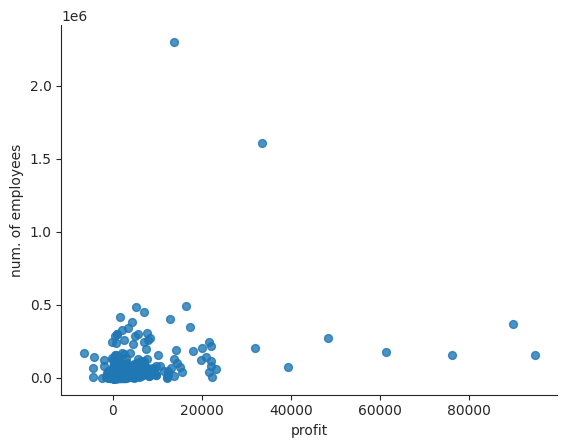

In [ ]:
# profit vs num. of employees

from matplotlib import pyplot as plt
mydata.plot(kind='scatter', x='profit', y='num. of employees', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

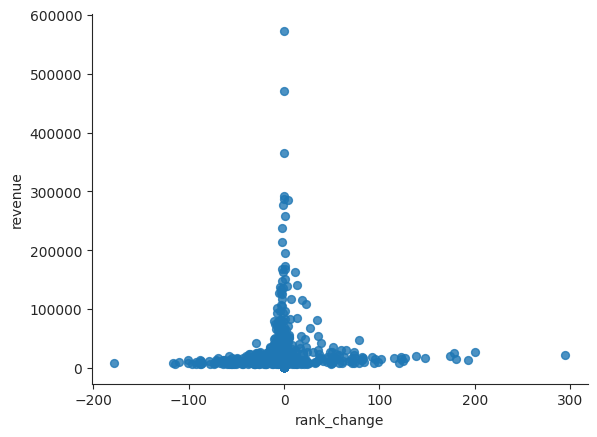

In [ ]:
# rank_change vs revenue

from matplotlib import pyplot as plt
mydata.plot(kind='scatter', x='rank_change', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

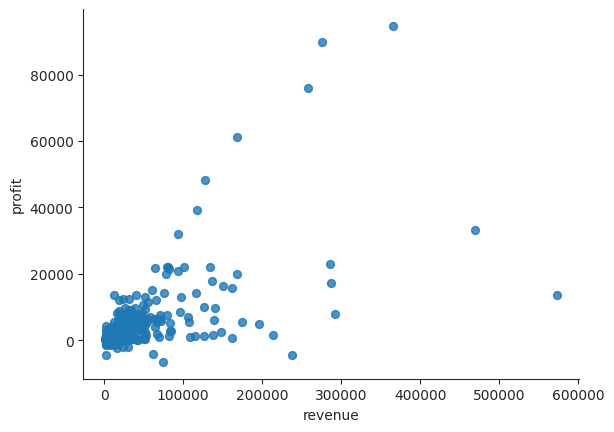

In [ ]:
# revenue vs profit
from matplotlib import pyplot as plt
mydata.plot(kind='scatter', x='revenue', y='profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

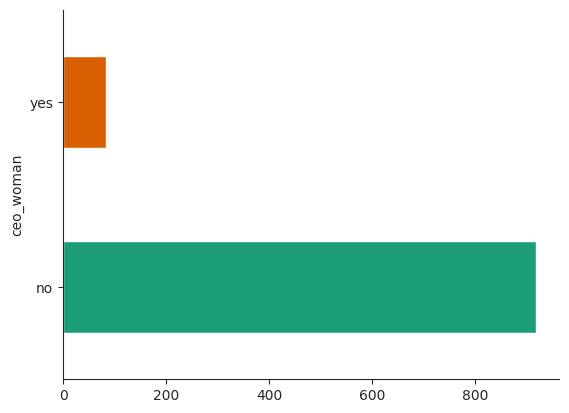

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
mydata.groupby('ceo_woman').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

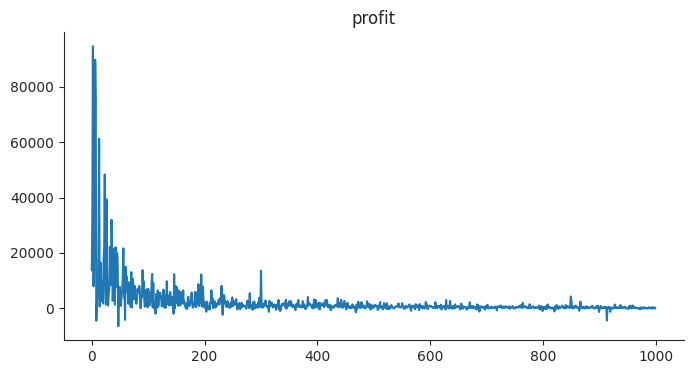

In [ ]:

from matplotlib import pyplot as plt
mydata['profit'].plot(kind='line', figsize=(8, 4), title='profit')
plt.gca().spines[['top', 'right']].set_visible(False)

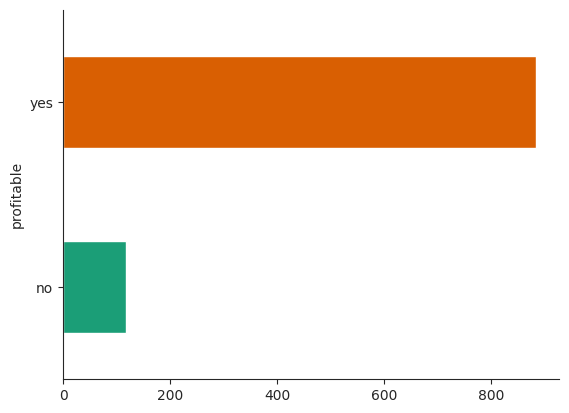

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
mydata.groupby('profitable').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

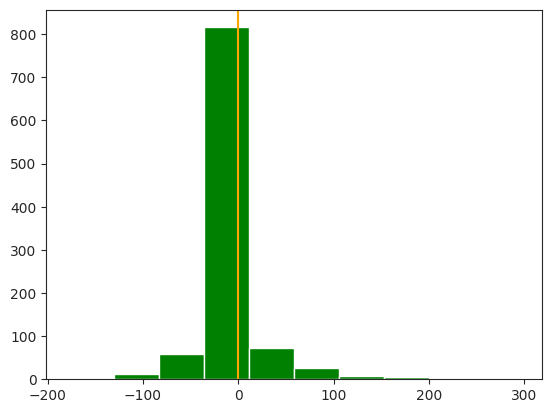

In [ ]:
x = mydata['rank_change']
fig, ax = plt.subplots()
plt.axvline(x=x.mean(), color='orange')
_ = plt.hist(mydata['rank_change'], color='green')

In [ ]:
np.median(mydata['rank_change'])

0.0

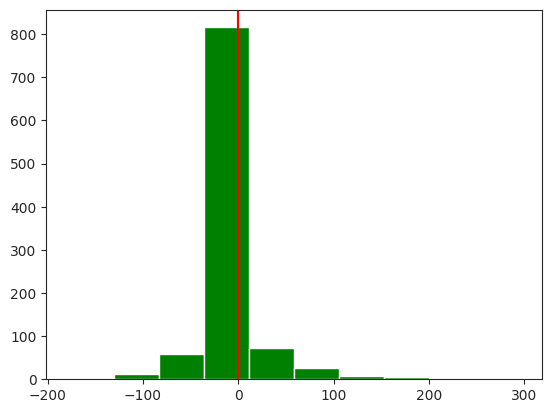

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='red')
_ = plt.hist(x, color = 'green')

In [ ]:
x.var() # variation

1012.4280270270272

In [ ]:
x.var()**(1/2) # standard deviation

31.818674187134622

In [ ]:
sigma = x.std()
sigma

31.818674187134622

The standard error of the mean (SEM) is calculated as the standard deviation of the sample divided by the square root of the sample size

In [ ]:
sigma/(x.size)**(1/2) #standard error

1.0061948255815207

In [ ]:
st.sem(x) # defaults to 1 degree of freedom

1.0061948255815207

**Gaussian** Distrubution

In [ ]:
sns.set_style('ticks')

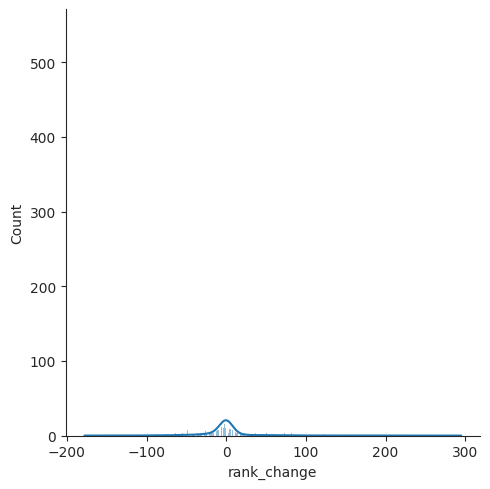

In [ ]:
_ = sns.displot(x, kde=True) #distrubution of rank change

In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

Sampling from skewed distrubtion

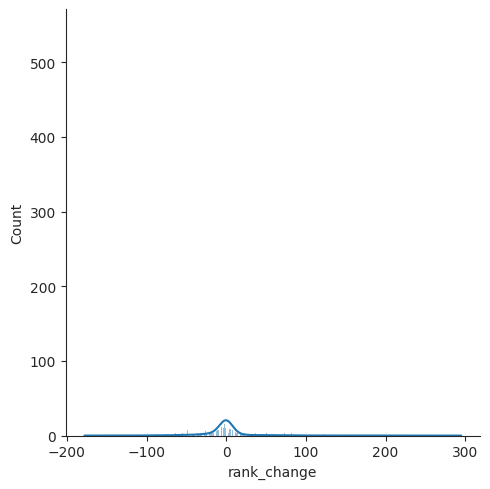

In [ ]:
_ = sns.displot(x, kde=True)

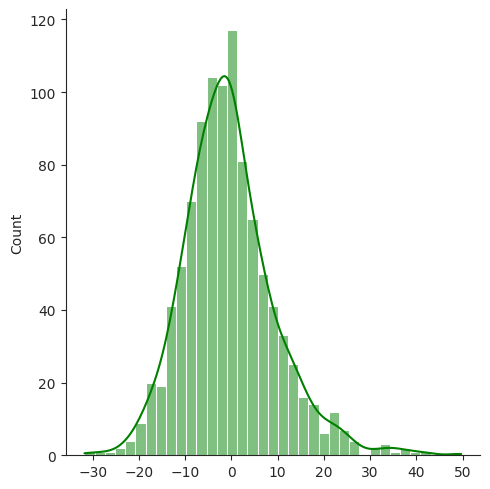

In [ ]:
_ = sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)

Sampling from a multimodal distribution

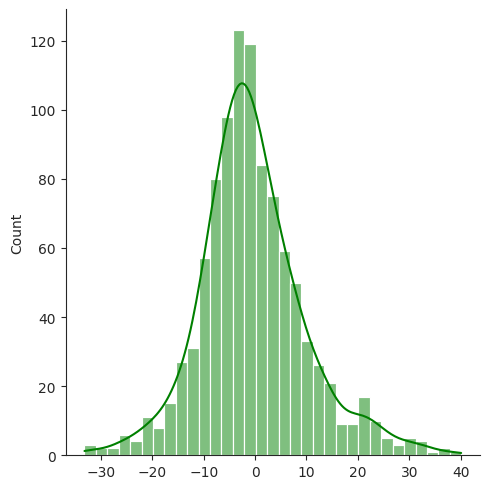

In [ ]:
_ = sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)

Sampling from uniform

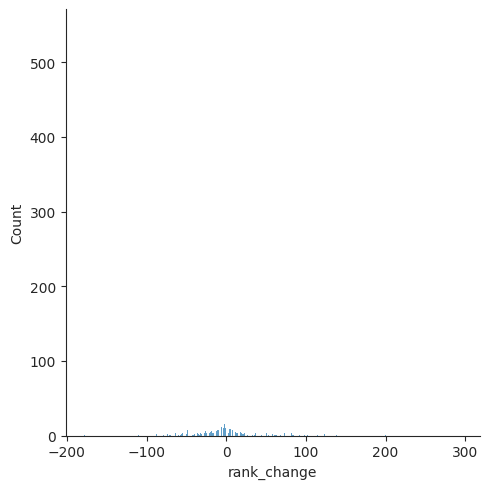

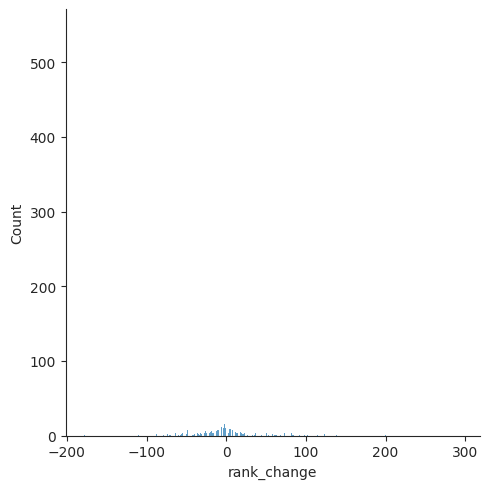

In [ ]:
_ = sns.displot(x)

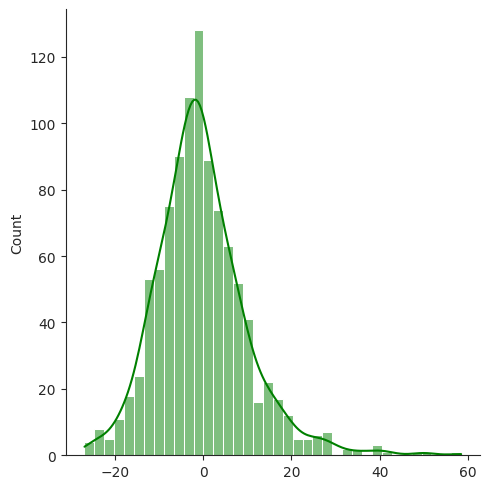

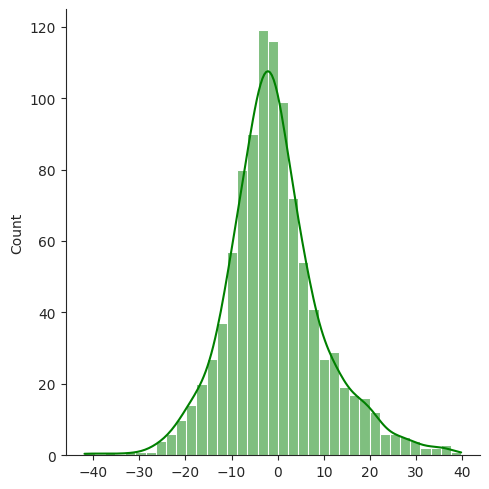

In [ ]:
_ = sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)

z-scores

In [ ]:
x_i = 85
mu = 60
sigma = 10

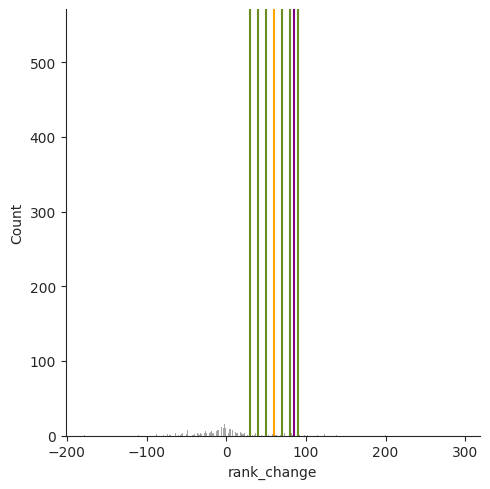

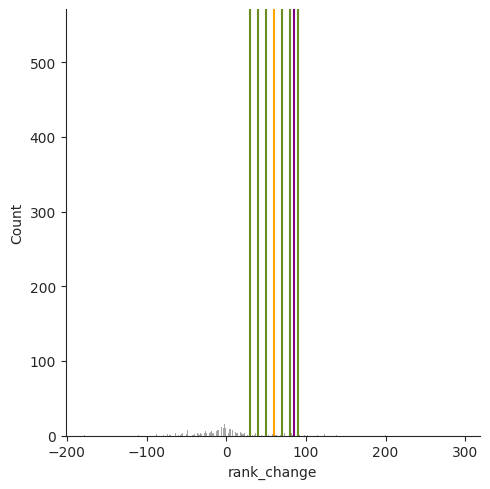

In [ ]:
sns.displot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [ ]:
z = (x_i - mu)/sigma
z

2.5

2.5

In [ ]:
z = (x_i - np.mean(x))/np.std(x)
z

2.6947660408600305

2.6947660408600305

p-value

In [ ]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

0.006209665325776132

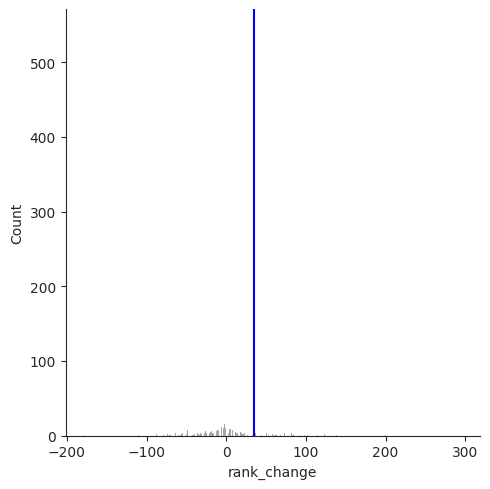

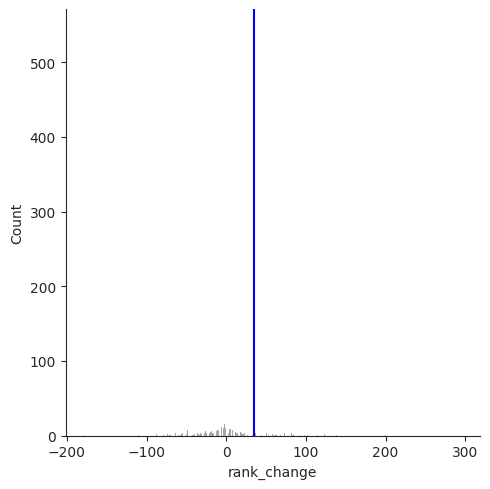

In [ ]:
sns.displot(x, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

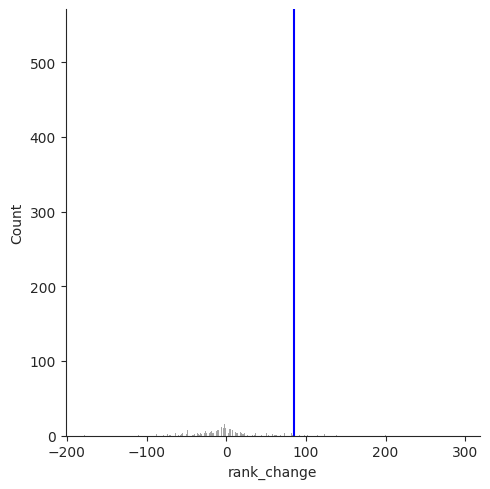

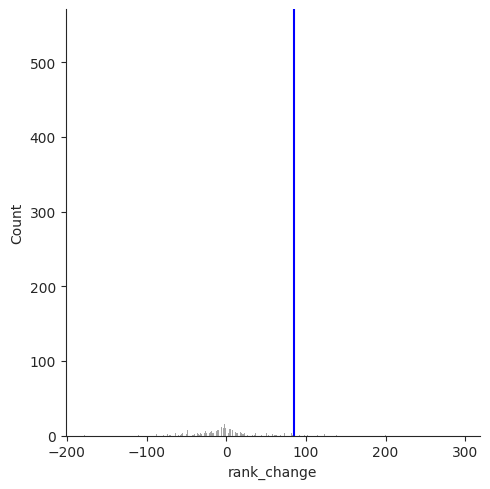

In [ ]:
sns.displot(x, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [ ]:
p_above = 1-st.norm.cdf(2.5)
p_above
p_outside = p_below + p_above
p_outside

0.01241933065155229

0.01241933065155229

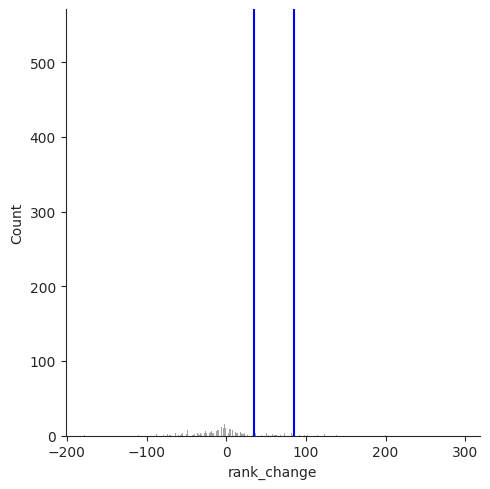

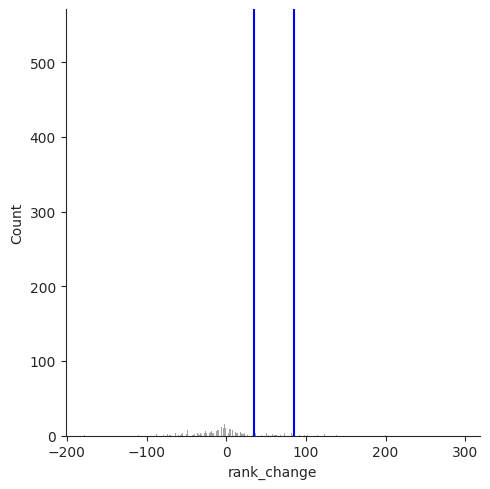

In [ ]:
sns.displot(x, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

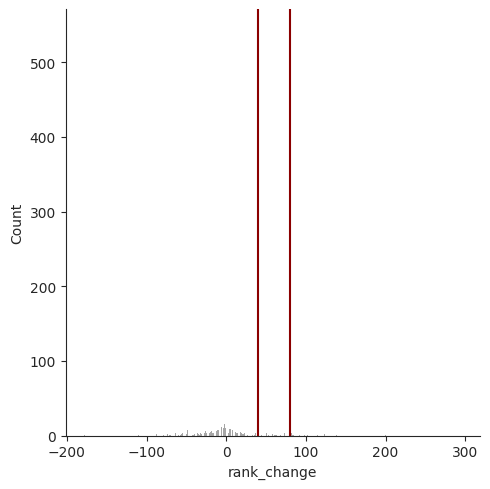

In [ ]:
sns.displot(x, color='gray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')

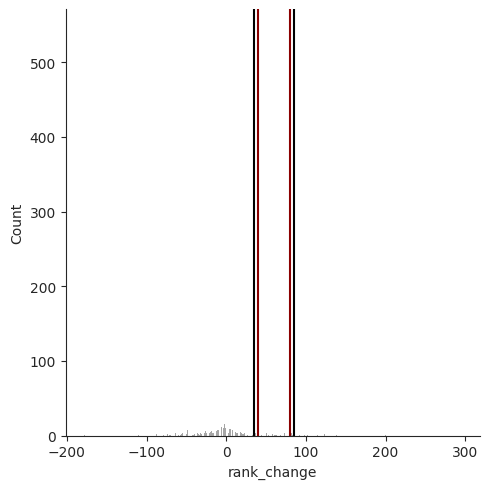

In [ ]:
sns.displot(x, color='gray')

plt.axvline(mu+1.96*sigma, color='darkred')
plt.axvline(mu-1.96*sigma, color='darkred')

plt.axvline(mu+2.56*sigma, color='black')
_ = plt.axvline(mu-2.56*sigma, color='black')